In [1]:
pwd


'/Users/arnoldsomuah/Downloads'

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [4]:
df = pd.read_csv('Performance.csv')

In [5]:
df.head()

,student_id,gender,age,grade_level,english_score,math_score,science_score,social_studies_score
0,1,M,16,11,80,90,85,75
1,2,F,15,10,70,80,92,78
2,3,F,17,12,88,72,90,80
3,4,M,16,11,65,82,78,85
4,5,F,14,9,75,88,85,80


In [6]:
df.shape

(40, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   student_id            40 non-null     int64 
 1   gender                40 non-null     object
 2   age                   40 non-null     int64 
 3   grade_level           40 non-null     int64 
 4   english_score         40 non-null     int64 
 5   math_score            40 non-null     int64 
 6   science_score         40 non-null     int64 
 7   social_studies_score  40 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.6+ KB


### How many male and female students are in the dataset?

In [20]:
gender_type = df['gender'].count()

gender_type

40

In [14]:
#number female and male students
gender_type = df['gender'].value_counts()
gender_type

F    21
M    19
Name: gender, dtype: int64


### What is the average age of the students in the dataset?

In [11]:
df.describe()

,student_id,age,grade_level,english_score,math_score,science_score,social_studies_score
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,15.675000,10.600000,82.675000,85.175000,86.650000,83.000000
std,11.690452,0.916725,1.007663,8.150468,7.242636,6.435279,6.575011
min,1.000000,14.000000,9.000000,65.000000,68.000000,70.000000,70.000000
25%,10.750000,15.000000,10.000000,78.000000,80.750000,83.500000,77.750000
50%,20.500000,16.000000,11.000000,84.000000,85.500000,88.000000,84.500000
75%,30.250000,16.000000,11.000000,89.000000,91.000000,92.000000,88.000000
max,40.000000,17.000000,12.000000,95.000000,97.000000,96.000000,94.000000


In [22]:
#the average number of students
student_avg = df['student_id'].mean()
student_avg

20.5

### Is there any missing data in the dataset? If so, which observations and which features have missing data?

In [25]:
df.isnull().sum()

student_id              0
gender                  0
age                     0
grade_level             0
english_score           0
math_score              0
science_score           0
social_studies_score    0
dtype: int64

In [29]:
df.isnull().shape

(40, 8)

From the above codes i can infer that there are no missing values in this data set

### What is the range of English scores in the dataset?

In [54]:
df.describe()

,student_id,age,grade_level,english_score,math_score,science_score,social_studies_score
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,15.675000,10.600000,82.675000,85.175000,86.650000,83.000000
std,11.690452,0.916725,1.007663,8.150468,7.242636,6.435279,6.575011
min,1.000000,14.000000,9.000000,65.000000,68.000000,70.000000,70.000000
25%,10.750000,15.000000,10.000000,78.000000,80.750000,83.500000,77.750000
50%,20.500000,16.000000,11.000000,84.000000,85.500000,88.000000,84.500000
75%,30.250000,16.000000,11.000000,89.000000,91.000000,92.000000,88.000000
max,40.000000,17.000000,12.000000,95.000000,97.000000,96.000000,94.000000


In [58]:
English_scores  = df['english_score'].max() - df['english_score'].min()
English_scores


30

### Is there any correlation between English and science scores? If so, what is the correlation coefficient? 

<AxesSubplot:>

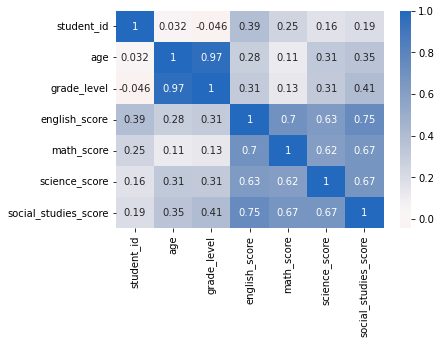

In [68]:
sb.heatmap(df.corr('pearson'), annot = True,cmap = 'vlag_r', center = 0)

From the above visualisation, we see that there is a correlation between the english and science scores
(the correlation coefficient is displayed as well)

In [65]:
# correlation coefficient
corr_coeff = df['english_score'].corr(df['science_score'])
corr_coeff

0.6293841680797964

###  Create a scatter plot to visualize the relationship between math and social studies scores. What do you observe?

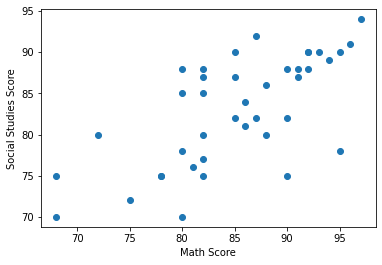

In [74]:
plt.scatter(df['math_score'],df['social_studies_score'])
plt.xlabel('Math Score')
plt.ylabel('Social Studies Score')
plt.show()


From this graph i have observed that the more points are moving upwards hence we can infer that there is a slightly 
strong positive correlation.

### Which student has the highest overall score? What are their individual subject scores?

In [150]:
df['overall_score'] = df['english_score'] + df['math_score'] + df['science_score'] + df['social_studies_score']

highest_score = df.iloc[df['overall_score'].idxmax()]
highest_score

student_id               32
gender                    F
age                      15
grade_level              10
english_score            95
math_score               97
science_score            96
social_studies_score     94
overall_score           382
Name: 31, dtype: object

### Are there any outliers in the dataset? If so, which observation(s) can be considered outliers and why?

<AxesSubplot:>

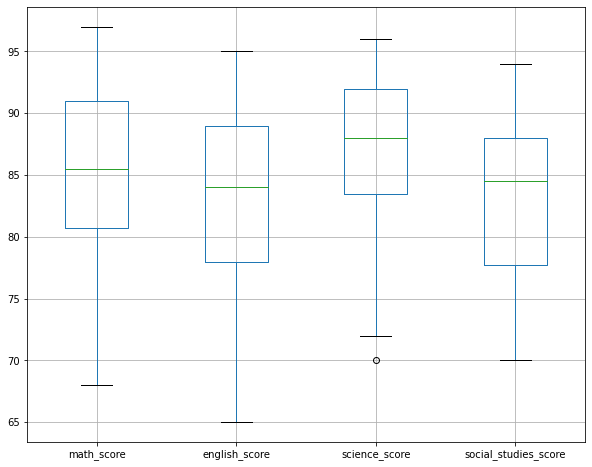

In [171]:
df[['math_score','english_score','science_score', 'social_studies_score']].boxplot(figsize= [10,8])

There is an outlier from the science score adn it is considered an outlier because it falls outside 1.5 times of the
interquartile range below the first quartile

### What is the standard deviation of the English scores?

In [86]:
english_scores  = df['english_score'].std()
english_scores

8.150467974609077

###  Create a histogram to visualize the distribution of math scores in the dataset. What can you infer from the histogram?

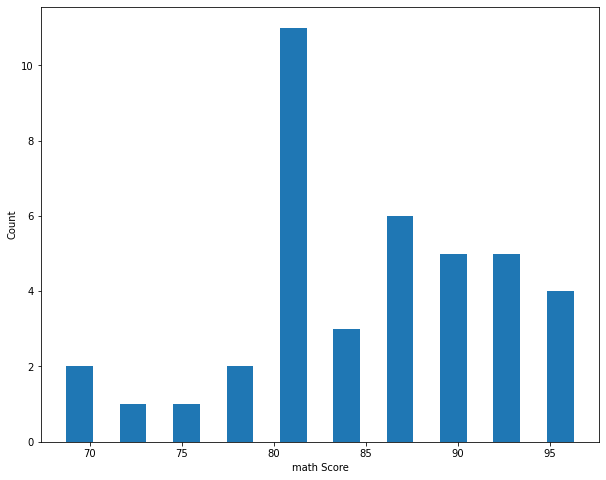

In [165]:
plt.figure(figsize=[10,8])
plt.hist(df['math_score'],bins =10, rwidth = 0.5 )
plt.xlabel('math Score')
plt.ylabel('Count')
plt.show()

From the above histogram, we can infer that most students had a score of 80 in the math test. 
Also, most students had scores between 70 and 95 giving it a good average of about 85 or 84.

###  What is the median science score in the dataset?

In [104]:
science_scores  = df['science_score'].median()
science_scores

88.0

### Calculate the interquartile range (IQR) of the English scores.

In [105]:
english_scores = df['english_score']
q1 = english_scores.quantile(0.25)
q3 = english_scores.quantile(0.75)
iqr = q3 - q1

iqr

11.0

### Which subject has the highest overall scores in the dataset?

In [149]:
df['overall_score'] = df['english_score'] + df['math_score'] + df['science_score'] + df['social_studies_score']

highest_subject = df.loc[:, 'english_score':'social_studies_score'].sum().idxmax()
print("The highest scoring subject is" ,highest_subject, "subject")

The highest scoring subject is science_score subject


### Create a boxplot to compare the distribution of math scores by gender. Are there any differences in the distributions?

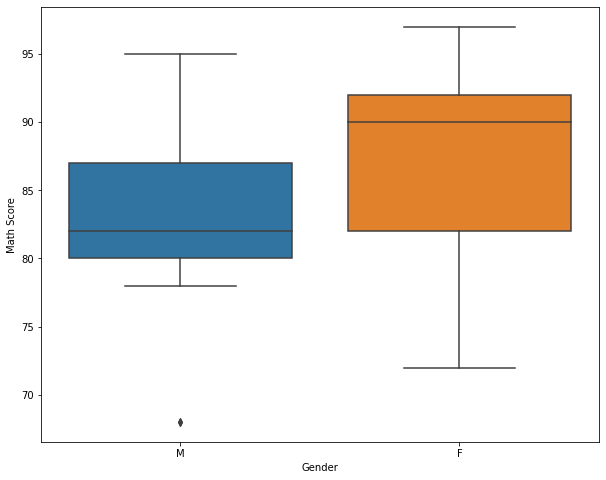

In [112]:
plt.figure(figsize = [10,8])
sb.boxplot(x='gender', y='math_score', data=df)
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

From the boxplots in the above, we can infer that the females have a higher median score in maths as compared to the males.  
Most male students scored above the median score and a few females scored above the median .

### What is the mode of the grade levels in the dataset?

In [130]:
mode_grade_level = stats.mode(df['grade_level'])

mode_grade_level[0][0]

11

### What is the correlation matrix for the dataset? Are there any highly correlated variables?

In [117]:
correlation_matrix = df.corr()
correlation_matrix

,student_id,age,grade_level,english_score,math_score,science_score,social_studies_score,overall_score
student_id,1.000000,0.032300,-0.045710,0.387646,0.250597,0.159167,0.191478,0.293684
age,0.032300,1.000000,0.965963,0.284062,0.113057,0.314896,0.348830,0.301629
grade_level,-0.045710,0.965963,1.000000,0.305335,0.129292,0.310005,0.406362,0.327436
english_score,0.387646,0.284062,0.305335,1.000000,0.701187,0.629384,0.746895,0.897919
math_score,0.250597,0.113057,0.129292,0.701187,1.000000,0.615301,0.673596,0.863773
science_score,0.159167,0.314896,0.310005,0.629384,0.615301,1.000000,0.671446,0.826952
social_studies_score,0.191478,0.348830,0.406362,0.746895,0.673596,0.671446,1.000000,0.884650
overall_score,0.293684,0.301629,0.327436,0.897919,0.863773,0.826952,0.884650,1.000000


<AxesSubplot:>

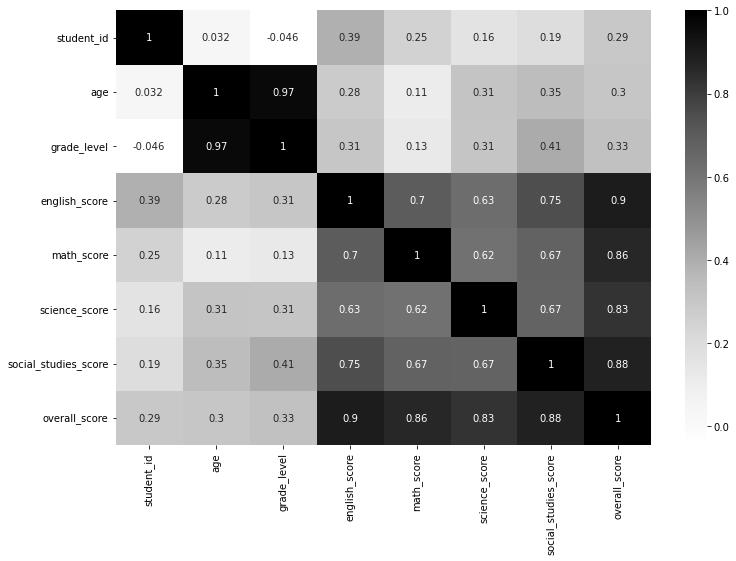

In [139]:
plt.figure(figsize= [12,8])
sb.heatmap(df.corr('pearson'),annot= True, cmap = 'Greys')

Yes please there are some highly correlated values. We can infer that the values closest to positive 1 are
positively correlated and values close or equal to -1 are negatively correlated.   
For example,
The Value between the age and the grade level = 0.97 has a high postive correlation.    
Also from the heatmap which gives a graphical representation of the correlation matrix, the very dark areas show that the correlation is positve and the very light areas show that it negative


###  Create a scatter matrix to visualize the pairwise relationships between all variables in the dataset.

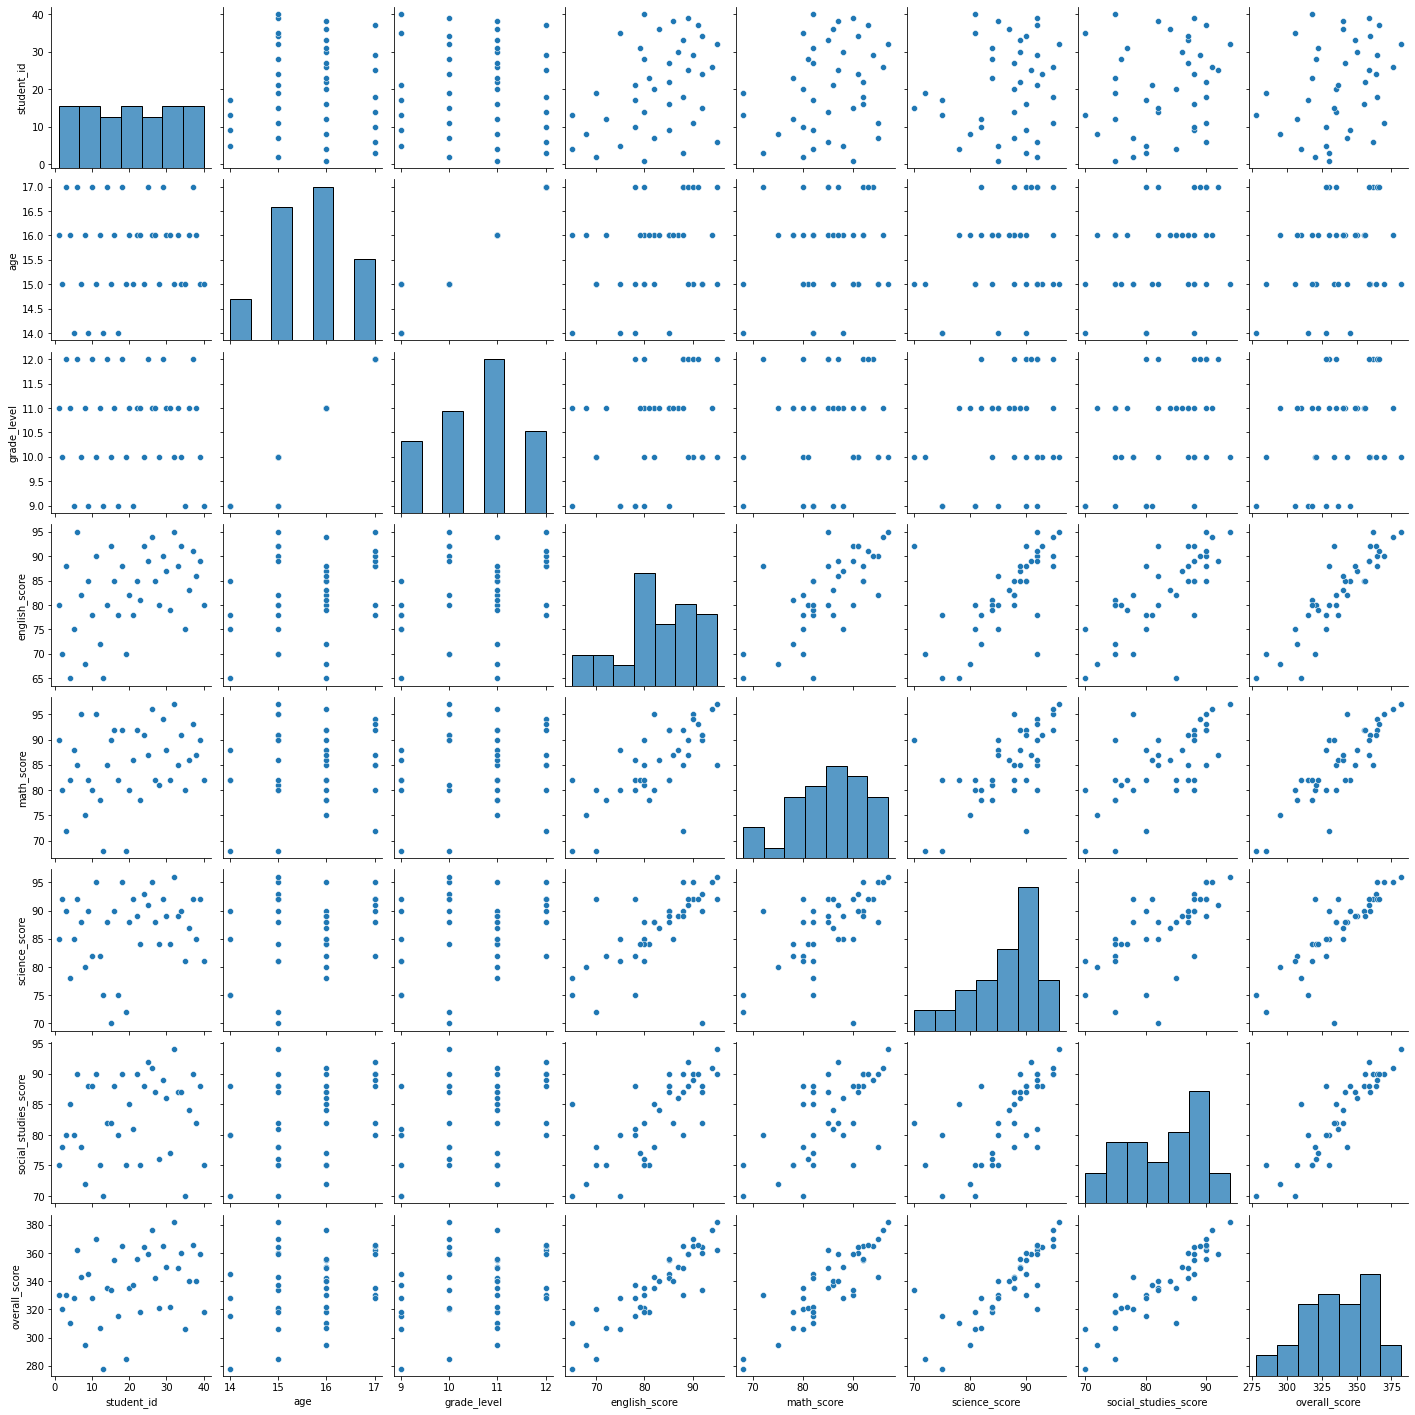

In [141]:
sb.pairplot(df)

### What is the range of ages in the dataset

In [144]:
age_range  = df['age'].max() - df['age'].min()
age_range

3

### Which student has the lowest overall score? What are their individual subject scores?

In [154]:
df['overall_score'] = df['english_score'] + df['math_score'] + df['science_score'] + df['social_studies_score']

lowest_score = df.iloc[df['overall_score'].idxmin()]
lowest_score

student_id               13
gender                    M
age                      14
grade_level               9
english_score            65
math_score               68
science_score            75
social_studies_score     70
overall_score           278
Name: 12, dtype: object

###  What is the difference between the mean and median math scores in the dataset? Is the distribution skewed?

In [156]:
math_mean = df['math_score'].mean()
math_mean

85.175

In [158]:
math_median = df['math_score'].median()
math_median

85.5

In [159]:
diff = math_median - math_mean
diff

0.32500000000000284

/Users/arnoldsomuah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math_score', ylabel='Density'>

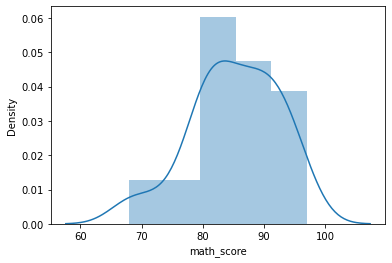

In [166]:
sb.distplot(df['math_score'])

Yes the distribution is negatively skewed.

###  Calculate the z-score for the social studies score of the student with ID 15.

In [163]:
social_studies_mean = df['social_studies_score'].mean()
social_studies_std = df['social_studies_score'].std()

# finding the social studies score for the student with ID 15
id15_social_studies_score = df.loc[df['student_id'] == 15, 'social_studies_score'].values[0]

# z_Score  >> z = (observation - Mean)/ Standard Deviation
z_score = (id15_social_studies_score - social_studies_mean) / social_studies_std
z_score

-0.15209100104169468